## Regression models implementation on Flight Fare dataset

#### dataset link: https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction

### Regression Models
- Linear Regression
- Ridge Regression
- Lasso Regression
- Elastic-Net Regression
- Performance metrics for above models

#### Importing the packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Reading the dataset

In [79]:
df=pd.read_excel('Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Shape of the Dataset

In [80]:
df.shape

(10683, 11)

##### The dataset has 10683 Rows and 11 features

#### Basic info of the dataset

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


##### All features are of objective type except the target feature 'Price'. There ale also very less number of null values.

#### Checking null values

In [82]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

##### There are only a couple of null values one each in 'Route' and 'Total_Stops' features so we can safely remove them

#### Removing the rows having null values in 'Route' and 'Total_Stops' features

In [83]:
df[(df['Route'].isnull()==True)&(df['Total_Stops'].isnull()==True)]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [84]:
#deleting index 9039 which contains both the null values
df.drop(9039, inplace=True,index=None)

In [85]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

##### Now the dataset is free of null values

#### Data cleaning, Feature transformation, Feature encoding

In [86]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### We have noticed from basic info of the dataset that all the features are of objective type except for 'Price'. We need to convert the features to numerical type to fit into our ML models. We'll now start analyse the features one by one and do the transformation and necessary encoding.

#### Airline

In [87]:
d_airline=dict(df['Airline'].value_counts())
d_airline

{'Jet Airways': 3849,
 'IndiGo': 2053,
 'Air India': 1751,
 'Multiple carriers': 1196,
 'SpiceJet': 818,
 'Vistara': 479,
 'Air Asia': 319,
 'GoAir': 194,
 'Multiple carriers Premium economy': 13,
 'Jet Airways Business': 6,
 'Vistara Premium economy': 3,
 'Trujet': 1}

In [88]:
#encoding the values ranked on their individual counts
val=1
for i in d_airline:
    d_airline[i]=val
    val+=1
d_airline

{'Jet Airways': 1,
 'IndiGo': 2,
 'Air India': 3,
 'Multiple carriers': 4,
 'SpiceJet': 5,
 'Vistara': 6,
 'Air Asia': 7,
 'GoAir': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways Business': 10,
 'Vistara Premium economy': 11,
 'Trujet': 12}

In [89]:
df['Airline']=df['Airline'].map(d)
df_clone=df.copy()
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,2,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,3,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,1,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,2,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,2,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


#### Date_of_Journey

In [90]:
# Splitting the Date_of_Journey feature into 3 different features day, month, year features
df['Date_of_Journey']=df['Date_of_Journey'].apply(lambda x: x.replace('/',''))
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,2,24032019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,3,1052019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,1,9062019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,2,12052019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,2,01032019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [91]:
df['Date_of_Journey']=df['Date_of_Journey'].apply(lambda x:'0'+x if len(x)==7 else x)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,2,24032019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,3,01052019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,1,09062019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,2,12052019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,2,01032019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [92]:
df['day']=df['Date_of_Journey'].apply(lambda x:x[:2])
df['month']=df['Date_of_Journey'].apply(lambda x:x[2:4])
df['year']=df['Date_of_Journey'].apply(lambda x:x[4:])
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,2,24032019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,3,01052019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,01,05,2019
2,1,09062019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,09,06,2019
3,2,12052019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,2,01032019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [93]:
#now that we've split the date column into 3 separate columns, we can safely remove the 'Date_of_Journey' column
df.drop('Date_of_Journey',axis=1,inplace=True)
df_clone=df.copy()
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,2,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,3,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,01,05,2019
2,1,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,09,06,2019
3,2,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,2,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


#### Source

In [94]:
d_source=dict(df['Source'].value_counts())
d_source

{'Delhi': 4536,
 'Kolkata': 2871,
 'Banglore': 2197,
 'Mumbai': 697,
 'Chennai': 381}

In [95]:
# Encoding the Source column ranked on the counts of each unique source
val=1
for i in d_source:
    d_source[i]=val
    val+=1
d_source

{'Delhi': 1, 'Kolkata': 2, 'Banglore': 3, 'Mumbai': 4, 'Chennai': 5}

In [96]:
df['Source']=df['Source'].map(d_source)
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,2,3,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,3,2,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,01,05,2019
2,1,1,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,09,06,2019
3,2,2,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,2,3,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


#### Destination

In [103]:
d_dest=dict(df['Destination'].value_counts())
d_dest

{'Cochin': 4536,
 'Banglore': 2871,
 'Delhi': 1265,
 'New Delhi': 932,
 'Hyderabad': 697,
 'Kolkata': 381}

In [104]:
# we can see there are 2 separate Destination for 'New Delhi' and 'Delhi' whereas both are same airport DEL. 
#So we need to make this modification in our d_dest dictionary
d_dest['Delhi']=d_dest['Delhi']+d_dest['New Delhi']
d_dest

{'Cochin': 4536,
 'Banglore': 2871,
 'Delhi': 2197,
 'New Delhi': 932,
 'Hyderabad': 697,
 'Kolkata': 381}

In [105]:
d_dest.pop('New Delhi')
d_dest

{'Cochin': 4536,
 'Banglore': 2871,
 'Delhi': 2197,
 'Hyderabad': 697,
 'Kolkata': 381}

In [106]:
#Now we need to modify our Destination column to replace all 'New Delhi' values with 'Delhi'
df['Destination']=df['Destination'].apply(lambda x : x.replace(' ',''))
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,2,3,NewDelhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,3,2,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,01,05,2019
2,1,1,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,09,06,2019
3,2,2,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,2,3,NewDelhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,2,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,09,04,2019
10679,3,2,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,1,3,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,6,3,NewDelhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


In [107]:
df['Destination']=df['Destination'].apply(lambda x:'Delhi' if x=='NewDelhi' else x)
df                                   

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,2,3,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,3,2,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,01,05,2019
2,1,1,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,09,06,2019
3,2,2,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,2,3,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,2,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,09,04,2019
10679,3,2,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,1,3,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,6,3,Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


In [108]:
# Encoding the Destination column ranked on the counts of each unique destination
val=1
for i in d_dest:
    d_dest[i]=val
    val+=1
d_dest

{'Cochin': 1, 'Banglore': 2, 'Delhi': 3, 'Hyderabad': 4, 'Kolkata': 5}

In [109]:
df['Destination']=df['Destination'].map(d_dest)
df_clone=df.copy()
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,2,3,3,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,3,2,2,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,01,05,2019
2,1,1,1,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,09,06,2019
3,2,2,2,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,2,3,3,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [114]:
# Just to avoid conflict between source and destination we'll add 0 to our destination columns
for i in d_dest:
    d_dest[i]+=10
d_dest

{'Cochin': 11, 'Banglore': 12, 'Delhi': 13, 'Hyderabad': 14, 'Kolkata': 15}

In [116]:
df['Destination']=df['Destination'].apply(lambda x:x+10)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,2,3,13,1,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,3,2,12,2,05:50,13:15,7h 25m,2 stops,No info,7662,01,05,2019
2,1,1,11,3,09:25,04:25 10 Jun,19h,2 stops,No info,13882,09,06,2019
3,2,2,12,4,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,2,3,13,5,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,2,12,6,19:55,22:25,2h 30m,non-stop,No info,4107,09,04,2019
10679,3,2,12,6,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,1,3,13,1,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,6,3,13,1,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


#### Route

In [117]:
l_route=list(df['Route'].unique())
print(l_route)
print('total unique roots:',len(l_route))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128]
total unique roots: 128


In [118]:
# There are a total of 129 unique roots. We'll encode them accordingly.
val=1
d_route={}
for i in l_route:
    d_route[i]=val
    val+=1
d_route

{1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 13: 13,
 14: 14,
 15: 15,
 16: 16,
 17: 17,
 18: 18,
 19: 19,
 20: 20,
 21: 21,
 22: 22,
 23: 23,
 24: 24,
 25: 25,
 26: 26,
 27: 27,
 28: 28,
 29: 29,
 30: 30,
 31: 31,
 32: 32,
 33: 33,
 34: 34,
 35: 35,
 36: 36,
 37: 37,
 38: 38,
 39: 39,
 40: 40,
 41: 41,
 42: 42,
 43: 43,
 44: 44,
 45: 45,
 46: 46,
 47: 47,
 48: 48,
 49: 49,
 50: 50,
 51: 51,
 52: 52,
 53: 53,
 54: 54,
 55: 55,
 56: 56,
 57: 57,
 58: 58,
 59: 59,
 60: 60,
 61: 61,
 62: 62,
 63: 63,
 64: 64,
 65: 65,
 66: 66,
 67: 67,
 68: 68,
 69: 69,
 70: 70,
 71: 71,
 72: 72,
 73: 73,
 74: 74,
 75: 75,
 76: 76,
 77: 77,
 78: 78,
 79: 79,
 80: 80,
 81: 81,
 82: 82,
 83: 83,
 84: 84,
 85: 85,
 86: 86,
 87: 87,
 88: 88,
 89: 89,
 90: 90,
 91: 91,
 92: 92,
 93: 93,
 94: 94,
 95: 95,
 96: 96,
 97: 97,
 98: 98,
 99: 99,
 100: 100,
 101: 101,
 102: 102,
 103: 103,
 104: 104,
 105: 105,
 106: 106,
 107: 107,
 108: 108,
 109: 109,
 110: 110,
 111: 

In [125]:
d_route

{'BLR → DEL': 1,
 'CCU → IXR → BBI → BLR': 2,
 'DEL → LKO → BOM → COK': 3,
 'CCU → NAG → BLR': 4,
 'BLR → NAG → DEL': 5,
 'CCU → BLR': 6,
 'BLR → BOM → DEL': 7,
 'DEL → BOM → COK': 8,
 'DEL → BLR → COK': 9,
 'MAA → CCU': 10,
 'CCU → BOM → BLR': 11,
 'DEL → AMD → BOM → COK': 12,
 'DEL → PNQ → COK': 13,
 'DEL → CCU → BOM → COK': 14,
 'BLR → COK → DEL': 15,
 'DEL → IDR → BOM → COK': 16,
 'DEL → LKO → COK': 17,
 'CCU → GAU → DEL → BLR': 18,
 'DEL → NAG → BOM → COK': 19,
 'CCU → MAA → BLR': 20,
 'DEL → HYD → COK': 21,
 'CCU → HYD → BLR': 22,
 'DEL → COK': 23,
 'CCU → DEL → BLR': 24,
 'BLR → BOM → AMD → DEL': 25,
 'BOM → DEL → HYD': 26,
 'DEL → MAA → COK': 27,
 'BOM → HYD': 28,
 'DEL → BHO → BOM → COK': 29,
 'DEL → JAI → BOM → COK': 30,
 'DEL → ATQ → BOM → COK': 31,
 'DEL → JDH → BOM → COK': 32,
 'CCU → BBI → BOM → BLR': 33,
 'BLR → MAA → DEL': 34,
 'DEL → GOI → BOM → COK': 35,
 'DEL → BDQ → BOM → COK': 36,
 'CCU → JAI → BOM → BLR': 37,
 'CCU → BBI → BLR': 38,
 'BLR → HYD → DEL': 39,
 'DEL →

In [112]:
df['Route']=df['Route'].map(d_route)
df_clone=df.copy()
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,2,3,3,1,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,3,2,2,2,05:50,13:15,7h 25m,2 stops,No info,7662,01,05,2019
2,1,1,1,3,09:25,04:25 10 Jun,19h,2 stops,No info,13882,09,06,2019
3,2,2,2,4,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,2,3,3,5,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019


In [120]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,2,3,13,1,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,3,2,12,2,05:50,13:15,7h 25m,2 stops,No info,7662,01,05,2019
2,1,1,11,3,09:25,04:25 10 Jun,19h,2 stops,No info,13882,09,06,2019
3,2,2,12,4,18:05,23:30,5h 25m,1 stop,No info,6218,12,05,2019
4,2,3,13,5,16:50,21:35,4h 45m,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,2,12,6,19:55,22:25,2h 30m,non-stop,No info,4107,09,04,2019
10679,3,2,12,6,20:45,23:20,2h 35m,non-stop,No info,4145,27,04,2019
10680,1,3,13,1,08:20,11:20,3h,non-stop,No info,7229,27,04,2019
10681,6,3,13,1,11:30,14:10,2h 40m,non-stop,No info,12648,01,03,2019


#### Duration

In [134]:
#We'll try to convert the duration in minutes for the ease of calculation
df['Duration']=df['Duration'].apply(lambda x:x.replace(' ',''))
df['Duration']=df['Duration'].apply(lambda x:x.replace('m',''))
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,2,3,13,1,22:20,01:10 22 Mar,2h50,non-stop,No info,3897,24,03,2019
1,3,2,12,2,05:50,13:15,7h25,2 stops,No info,7662,01,05,2019


In [135]:
df['Duration']=df['Duration'].apply(lambda x:x+'00' if len(x)<4 else x)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,2,3,13,1,22:20,01:10 22 Mar,2h50,non-stop,No info,3897,24,03,2019
1,3,2,12,2,05:50,13:15,7h25,2 stops,No info,7662,01,05,2019
2,1,1,11,3,09:25,04:25 10 Jun,19h00,2 stops,No info,13882,09,06,2019
3,2,2,12,4,18:05,23:30,5h25,1 stop,No info,6218,12,05,2019
4,2,3,13,5,16:50,21:35,4h45,1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,2,12,6,19:55,22:25,2h30,non-stop,No info,4107,09,04,2019
10679,3,2,12,6,20:45,23:20,2h35,non-stop,No info,4145,27,04,2019
10680,1,3,13,1,08:20,11:20,3h00,non-stop,No info,7229,27,04,2019
10681,6,3,13,1,11:30,14:10,2h40,non-stop,No info,12648,01,03,2019


In [136]:
df['Duration']=df['Duration'].apply(lambda x:x.split('h'))
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,2,3,13,1,22:20,01:10 22 Mar,"[2, 50]",non-stop,No info,3897,24,03,2019
1,3,2,12,2,05:50,13:15,"[7, 25]",2 stops,No info,7662,01,05,2019
2,1,1,11,3,09:25,04:25 10 Jun,"[19, 00]",2 stops,No info,13882,09,06,2019
3,2,2,12,4,18:05,23:30,"[5, 25]",1 stop,No info,6218,12,05,2019
4,2,3,13,5,16:50,21:35,"[4, 45]",1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,7,2,12,6,19:55,22:25,"[2, 30]",non-stop,No info,4107,09,04,2019
10679,3,2,12,6,20:45,23:20,"[2, 35]",non-stop,No info,4145,27,04,2019
10680,1,3,13,1,08:20,11:20,"[3, 00]",non-stop,No info,7229,27,04,2019
10681,6,3,13,1,11:30,14:10,"[2, 40]",non-stop,No info,12648,01,03,2019


In [172]:
#there is an error in the Duration column in the index 6474 where the data says flight duration between MUM and HYD is only 5 min which is definitely not possible. So we'll simply drop this row
df.iloc[6474,:]

Airline                  3
Source                   4
Destination             14
Route                  109
Dep_Time             16:50
Arrival_Time         16:55
Duration             [500]
Total_Stops        2 stops
Additional_Info    No info
Price                17327
day                     06
month                   03
year                  2019
Name: 6474, dtype: object

In [174]:
df.drop(6474,inplace=True)
df.reset_index(inplace=True)
df

,index,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year
0,0,2,3,13,1,22:20,01:10 22 Mar,"[2, 50]",non-stop,No info,3897,24,03,2019
1,1,3,2,12,2,05:50,13:15,"[7, 25]",2 stops,No info,7662,01,05,2019
2,2,1,1,11,3,09:25,04:25 10 Jun,"[19, 00]",2 stops,No info,13882,09,06,2019
3,3,2,2,12,4,18:05,23:30,"[5, 25]",1 stop,No info,6218,12,05,2019
4,4,2,3,13,5,16:50,21:35,"[4, 45]",1 stop,No info,13302,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,10678,7,2,12,6,19:55,22:25,"[2, 30]",non-stop,No info,4107,09,04,2019
10677,10679,3,2,12,6,20:45,23:20,"[2, 35]",non-stop,No info,4145,27,04,2019
10678,10680,1,3,13,1,08:20,11:20,"[3, 00]",non-stop,No info,7229,27,04,2019
10679,10681,6,3,13,1,11:30,14:10,"[2, 40]",non-stop,No info,12648,01,03,2019


In [175]:
#df=df_clone.copy()
df_clone=df.copy()
df['hours']=df['Duration'].apply(lambda x:x[0])
df['hours']=df['hours'].astype(int)
df['minutes']=df['Duration'].apply(lambda x:x[1])
df['minutes']=df['minutes'].astype(int)
#df['Duration']=df_clone['hours']*60+df_clone['minutes']
df

,index,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,hours,minutes
0,0,2,3,13,1,22:20,01:10 22 Mar,"[2, 50]",non-stop,No info,3897,24,03,2019,2,50
1,1,3,2,12,2,05:50,13:15,"[7, 25]",2 stops,No info,7662,01,05,2019,7,25
2,2,1,1,11,3,09:25,04:25 10 Jun,"[19, 00]",2 stops,No info,13882,09,06,2019,19,0
3,3,2,2,12,4,18:05,23:30,"[5, 25]",1 stop,No info,6218,12,05,2019,5,25
4,4,2,3,13,5,16:50,21:35,"[4, 45]",1 stop,No info,13302,01,03,2019,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,10678,7,2,12,6,19:55,22:25,"[2, 30]",non-stop,No info,4107,09,04,2019,2,30
10677,10679,3,2,12,6,20:45,23:20,"[2, 35]",non-stop,No info,4145,27,04,2019,2,35
10678,10680,1,3,13,1,08:20,11:20,"[3, 00]",non-stop,No info,7229,27,04,2019,3,0
10679,10681,6,3,13,1,11:30,14:10,"[2, 40]",non-stop,No info,12648,01,03,2019,2,40


In [176]:
#converting the Duration column into minutes
df['Duration']=df['hours']*60+df['minutes']
df_clone=df.copy()
df.head()

,index,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,hours,minutes
0,0,2,3,13,1,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,03,2019,2,50
1,1,3,2,12,2,05:50,13:15,445,2 stops,No info,7662,01,05,2019,7,25
2,2,1,1,11,3,09:25,04:25 10 Jun,1140,2 stops,No info,13882,09,06,2019,19,0
3,3,2,2,12,4,18:05,23:30,325,1 stop,No info,6218,12,05,2019,5,25
4,4,2,3,13,5,16:50,21:35,285,1 stop,No info,13302,01,03,2019,4,45


#### Total_Stops

In [180]:
#checking unique stops
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [181]:
df['Total_Stops']=df['Total_Stops'].map({'non-stop':0,'2 stops':2,'1 stop':1,'4 stops':4})

<bound method NDFrame.head of        index  Airline  Source  Destination  Route Dep_Time  Arrival_Time  \
0          0        2       3           13      1    22:20  01:10 22 Mar   
1          1        3       2           12      2    05:50         13:15   
2          2        1       1           11      3    09:25  04:25 10 Jun   
3          3        2       2           12      4    18:05         23:30   
4          4        2       3           13      5    16:50         21:35   
...      ...      ...     ...          ...    ...      ...           ...   
10676  10678        7       2           12      6    19:55         22:25   
10677  10679        3       2           12      6    20:45         23:20   
10678  10680        1       3           13      1    08:20         11:20   
10679  10681        6       3           13      1    11:30         14:10   
10680  10682        3       1           11     35    10:55         19:15   

       Duration  Total_Stops Additional_Info  Price day m

In [182]:
df.head()

,index,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,hours,minutes
0,0,2,3,13,1,22:20,01:10 22 Mar,170,0.0,No info,3897,24,03,2019,2,50
1,1,3,2,12,2,05:50,13:15,445,2.0,No info,7662,01,05,2019,7,25
2,2,1,1,11,3,09:25,04:25 10 Jun,1140,2.0,No info,13882,09,06,2019,19,0
3,3,2,2,12,4,18:05,23:30,325,1.0,No info,6218,12,05,2019,5,25
4,4,2,3,13,5,16:50,21:35,285,1.0,No info,13302,01,03,2019,4,45


#### Additional_Info

In [187]:
d_addi_info=dict(df['Additional_Info'].value_counts())
d_addi_info

{'No info': 8343,
 'In-flight meal not included': 1982,
 'No check-in baggage included': 320,
 '1 Long layover': 19,
 'Change airports': 7,
 'Business class': 4,
 'No Info': 3,
 '1 Short layover': 1,
 'Red-eye flight': 1,
 '2 Long layover': 1}

In [188]:
d_addi_info['No info']=d_addi_info['No info']+3
d_addi_info.pop('No Info')
d_addi_info

{'No info': 8346,
 'In-flight meal not included': 1982,
 'No check-in baggage included': 320,
 '1 Long layover': 19,
 'Change airports': 7,
 'Business class': 4,
 '1 Short layover': 1,
 'Red-eye flight': 1,
 '2 Long layover': 1}

In [189]:
# Encoding the 'Additional_Info' feature as per the count
val=1
for i in d_addi_info:
    d_addi_info[i]=val
    val+=1
d_addi_info

{'No info': 1,
 'In-flight meal not included': 2,
 'No check-in baggage included': 3,
 '1 Long layover': 4,
 'Change airports': 5,
 'Business class': 6,
 '1 Short layover': 7,
 'Red-eye flight': 8,
 '2 Long layover': 9}

In [190]:
df['Additional_Info']=df['Additional_Info'].map(d_addi_info)
df_clone=df.copy()
df.head()

,index,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,hours,minutes
0,0,2,3,13,1,22:20,01:10 22 Mar,170,0.0,1.0,3897,24,03,2019,2,50
1,1,3,2,12,2,05:50,13:15,445,2.0,1.0,7662,01,05,2019,7,25
2,2,1,1,11,3,09:25,04:25 10 Jun,1140,2.0,1.0,13882,09,06,2019,19,0
3,3,2,2,12,4,18:05,23:30,325,1.0,1.0,6218,12,05,2019,5,25
4,4,2,3,13,5,16:50,21:35,285,1.0,1.0,13302,01,03,2019,4,45


#### Dep_Time and Arrival_Time

In [191]:
df['Dep_Time']=df['Dep_Time'].apply(lambda x: x.replace(':',''))
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x: x.replace(':',''))
df.head()

,index,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,hours,minutes
0,0,2,3,13,1,2220,0110 22 Mar,170,0.0,1.0,3897,24,03,2019,2,50
1,1,3,2,12,2,0550,1315,445,2.0,1.0,7662,01,05,2019,7,25
2,2,1,1,11,3,0925,0425 10 Jun,1140,2.0,1.0,13882,09,06,2019,19,0
3,3,2,2,12,4,1805,2330,325,1.0,1.0,6218,12,05,2019,5,25
4,4,2,3,13,5,1650,2135,285,1.0,1.0,13302,01,03,2019,4,45


In [193]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x: x[:4]+'_'+x[5:] if len(x)>4 else x)
df.head(2)

,index,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,hours,minutes
0,0,2,3,13,1,2220,0110_22 Mar,170,0.0,1.0,3897,24,03,2019,2,50
1,1,3,2,12,2,0550,1315,445,2.0,1.0,7662,01,05,2019,7,25


In [194]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:x.split('_'))
df.head(2)

,index,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,hours,minutes
0,0,2,3,13,1,2220,"[0110, 22 Mar]",170,0.0,1.0,3897,24,03,2019,2,50
1,1,3,2,12,2,0550,[1315],445,2.0,1.0,7662,01,05,2019,7,25


In [195]:
df['next_day']=df['Arrival_Time'].apply(lambda x:1 if len(x)>1 else 0)
df.head(2)

,index,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,hours,minutes,next_day
0,0,2,3,13,1,2220,"[0110, 22 Mar]",170,0.0,1.0,3897,24,03,2019,2,50,1
1,1,3,2,12,2,0550,[1315],445,2.0,1.0,7662,01,05,2019,7,25,0


In [197]:
df['Arrival_Time']=df['Arrival_Time'].apply(lambda x:int(x[0]))
df

,index,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,hours,minutes,next_day
0,0,2,3,13,1,2220,110,170,0.0,1.0,3897,24,03,2019,2,50,1
1,1,3,2,12,2,0550,1315,445,2.0,1.0,7662,01,05,2019,7,25,0
2,2,1,1,11,3,0925,425,1140,2.0,1.0,13882,09,06,2019,19,0,1
3,3,2,2,12,4,1805,2330,325,1.0,1.0,6218,12,05,2019,5,25,0
4,4,2,3,13,5,1650,2135,285,1.0,1.0,13302,01,03,2019,4,45,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,10678,7,2,12,6,1955,2225,150,0.0,1.0,4107,09,04,2019,2,30,0
10677,10679,3,2,12,6,2045,2320,155,0.0,1.0,4145,27,04,2019,2,35,0
10678,10680,1,3,13,1,0820,1120,180,0.0,1.0,7229,27,04,2019,3,0,0
10679,10681,6,3,13,1,1130,1410,160,0.0,1.0,12648,01,03,2019,2,40,0


In [201]:
#introducing a new column 'flight_time_category' to check if the departure time was am(0) or pm(1)
df['flight_time_category']=df['Dep_Time'].apply(lambda x:0 if int(x)<1159 else 1)
df.head()

,index,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,hours,minutes,next_day,flight_time_category
0,0,2,3,13,1,2220,110,170,0.0,1.0,3897,24,03,2019,2,50,1,1
1,1,3,2,12,2,0550,1315,445,2.0,1.0,7662,01,05,2019,7,25,0,0
2,2,1,1,11,3,0925,425,1140,2.0,1.0,13882,09,06,2019,19,0,1,0
3,3,2,2,12,4,1805,2330,325,1.0,1.0,6218,12,05,2019,5,25,0,1
4,4,2,3,13,5,1650,2135,285,1.0,1.0,13302,01,03,2019,4,45,0,1


#### We have finally cleaned our dataset. It's time to drop some unwanted columns

In [202]:
df.drop(columns=['index','hours','minutes'],inplace=True)
df_clone=df.copy()
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,year,next_day,flight_time_category
0,2,3,13,1,2220,110,170,0.0,1.0,3897,24,03,2019,1,1
1,3,2,12,2,0550,1315,445,2.0,1.0,7662,01,05,2019,0,0
2,1,1,11,3,0925,425,1140,2.0,1.0,13882,09,06,2019,1,0
3,2,2,12,4,1805,2330,325,1.0,1.0,6218,12,05,2019,0,1
4,2,3,13,5,1650,2135,285,1.0,1.0,13302,01,03,2019,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,7,2,12,6,1955,2225,150,0.0,1.0,4107,09,04,2019,0,1
10677,3,2,12,6,2045,2320,155,0.0,1.0,4145,27,04,2019,0,1
10678,1,3,13,1,0820,1120,180,0.0,1.0,7229,27,04,2019,0,0
10679,6,3,13,1,1130,1410,160,0.0,1.0,12648,01,03,2019,0,0


#### Changing data types of the features

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Airline               10681 non-null  int64  
 1   Source                10681 non-null  int64  
 2   Destination           10681 non-null  int64  
 3   Route                 10681 non-null  int64  
 4   Dep_Time              10681 non-null  object 
 5   Arrival_Time          10681 non-null  int64  
 6   Duration              10681 non-null  int32  
 7   Total_Stops           10636 non-null  float64
 8   Additional_Info       10678 non-null  float64
 9   Price                 10681 non-null  int64  
 10  day                   10681 non-null  object 
 11  month                 10681 non-null  object 
 12  year                  10681 non-null  object 
 13  next_day              10681 non-null  int64  
 14  flight_time_category  10681 non-null  int64  
dtypes: float64(2), int3

In [212]:
#Changing all features to int
for features in df:
    df[features]=df[features].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Airline               10681 non-null  int32
 1   Source                10681 non-null  int32
 2   Destination           10681 non-null  int32
 3   Route                 10681 non-null  int32
 4   Dep_Time              10681 non-null  int32
 5   Arrival_Time          10681 non-null  int32
 6   Duration              10681 non-null  int32
 7   Total_Stops           10681 non-null  int32
 8   Additional_Info       10681 non-null  int32
 9   Price                 10681 non-null  int32
 10  day                   10681 non-null  int32
 11  month                 10681 non-null  int32
 12  year                  10681 non-null  int32
 13  next_day              10681 non-null  int32
 14  flight_time_category  10681 non-null  int32
dtypes: int32(15)
memory usage: 626.0 KB


#### Graphical SAnalysis

##### Now that we have converted all the features to int type, we can analyse them graphically

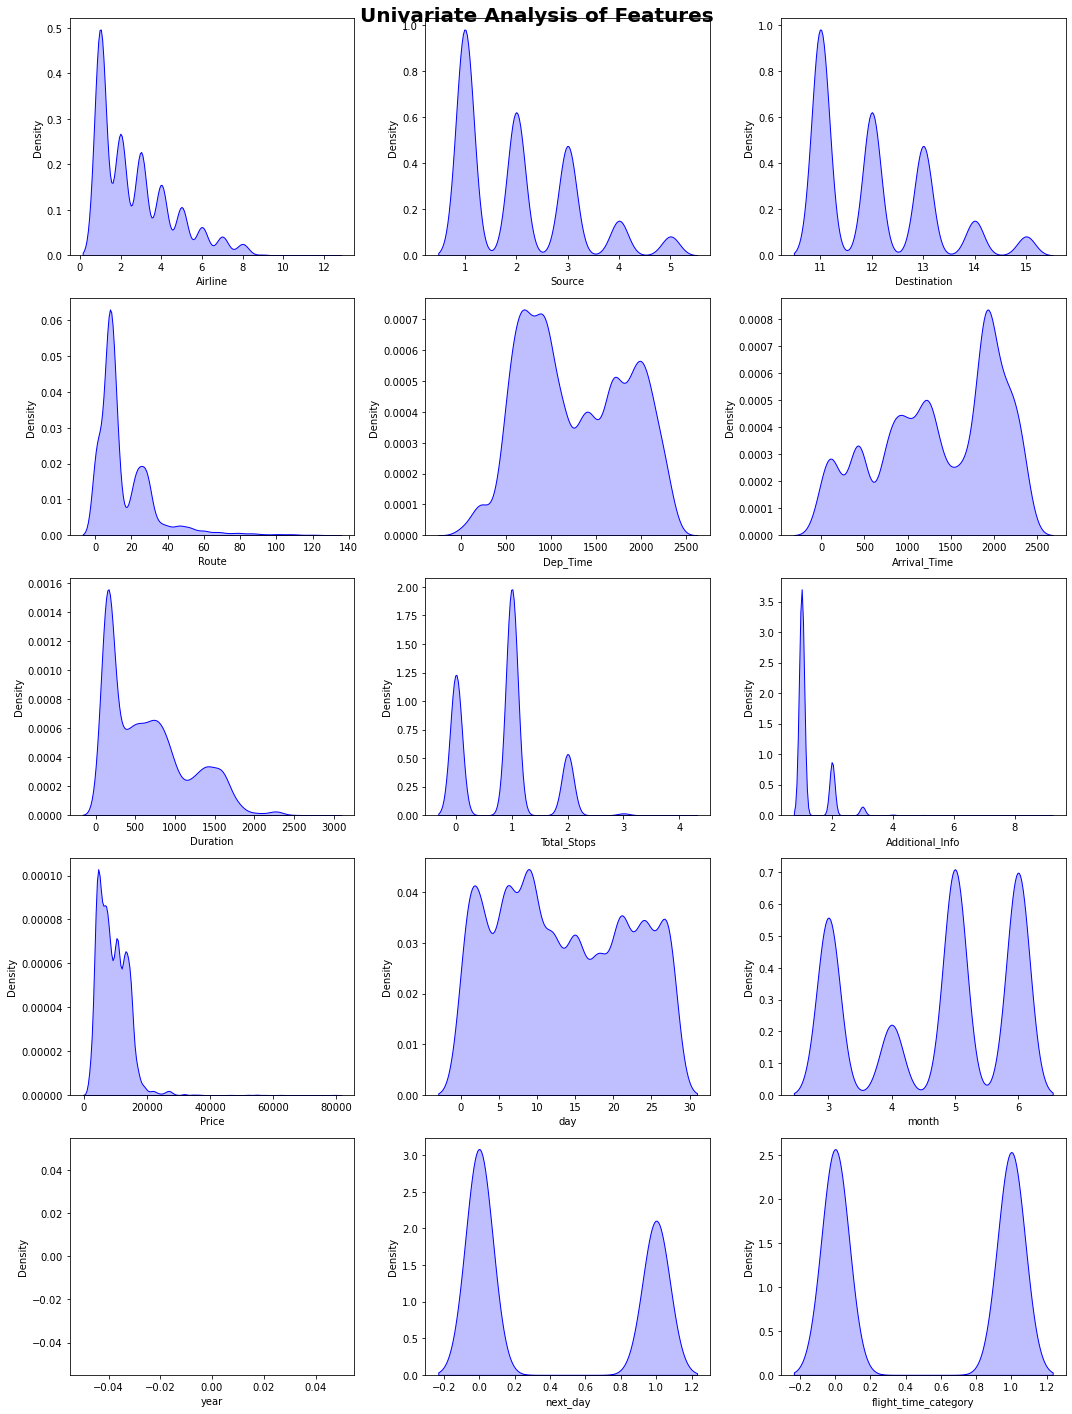

In [215]:
# Univariate analysis
plt.figure(figsize=(15,20))
plt.suptitle('Univariate Analysis of Features', fontsize=20, fontweight='bold')
c=0
for i in df:
    plt.subplot(5, 3, c+1)
    sns.kdeplot(x=df[i],shade=True, color='b')
    plt.xlabel(i)
    plt.tight_layout()
    c+=1

##### Feature wise comparison against 'Price'

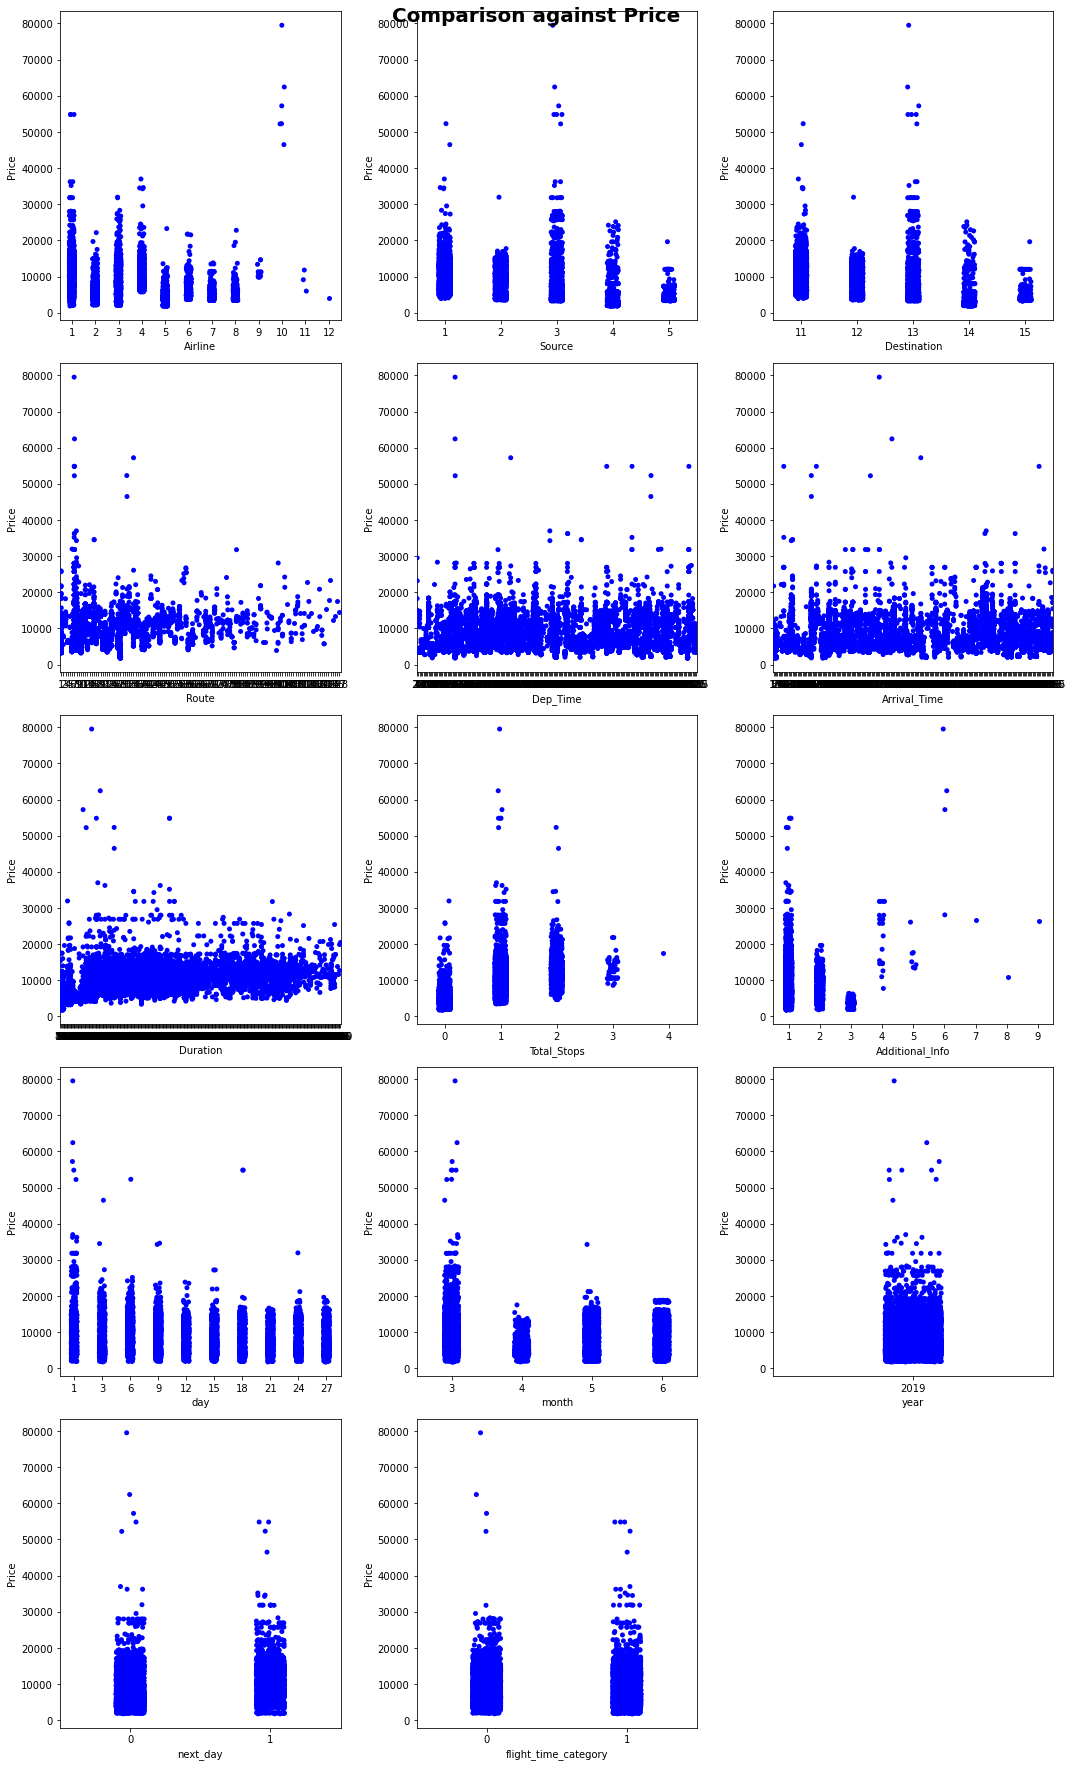

In [219]:
plt.figure(figsize=(15,25))
plt.suptitle('Comparison against Price', fontsize=20, fontweight='bold')
c=0
for i in df:
    if i!='Price':
        plt.subplot(5, 3, c+1)
        sns.stripplot(x=df[i],y=df['Price'],color='b')
        plt.xlabel(i)
        plt.tight_layout()
        c+=1

In [220]:
df['year'].unique()

array([2019])

In [221]:
#since there is only one value 2019 in the 'year' feature, we can safely drop it
df.drop(columns='year',inplace=True)

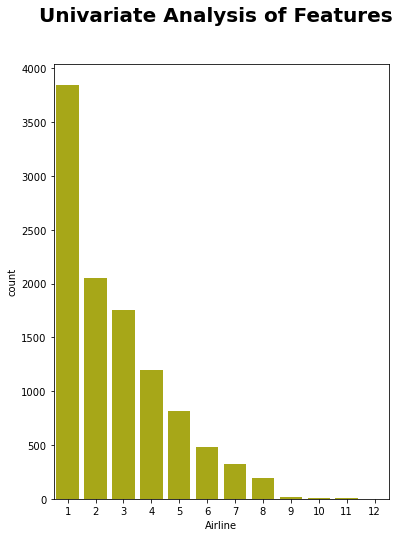

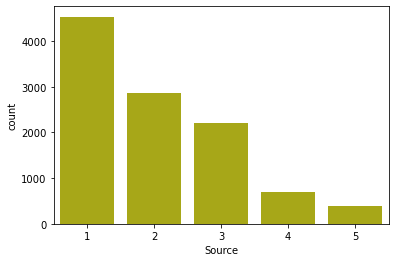

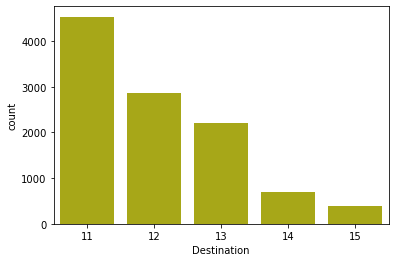

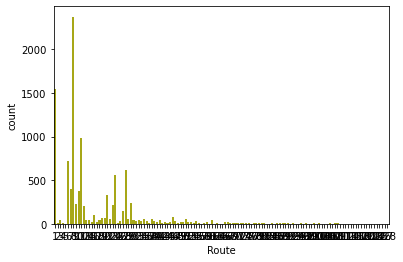

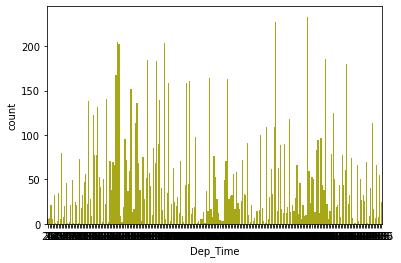

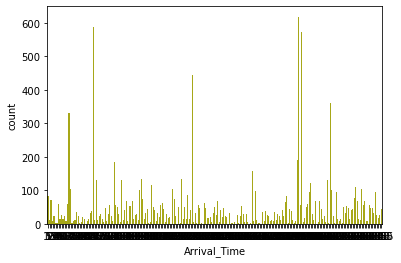

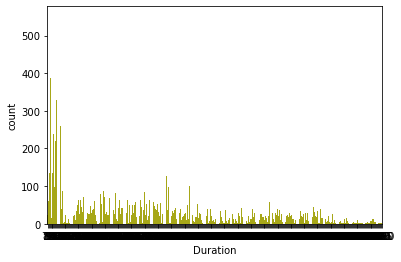

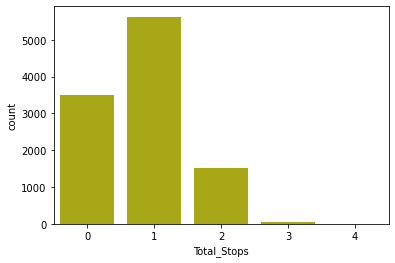

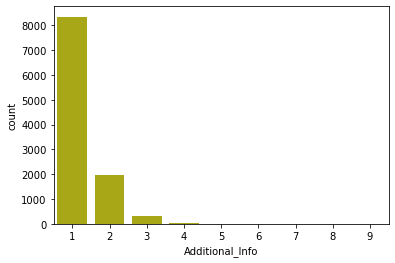

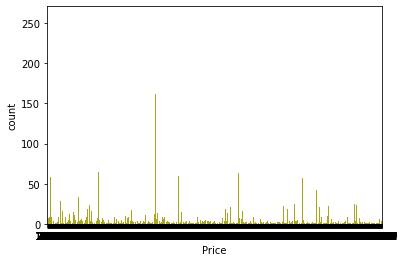

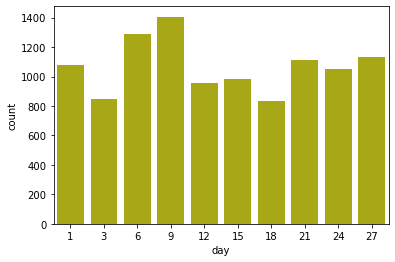

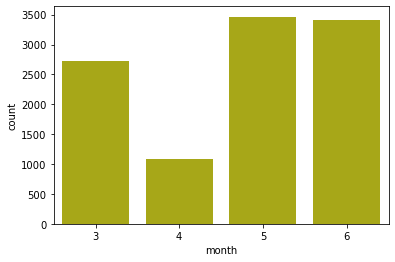

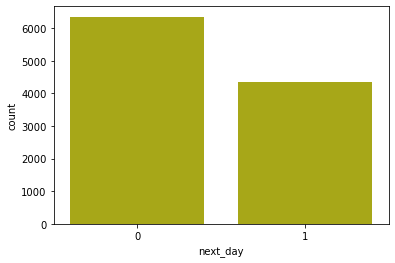

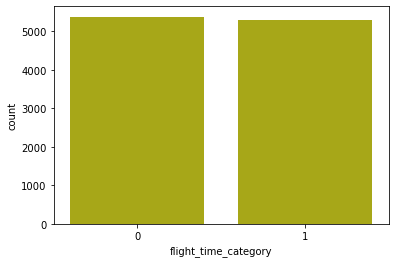

In [227]:
#analysing the features using countplot
plt.figure(figsize=(6,8))
plt.suptitle('Univariate Analysis of Features', fontsize=20, fontweight='bold')
c=0
for i in df:
    #plt.subplot(8, 2, c+1)
    sns.countplot(x=df[i], color='y')
    plt.xlabel(i)
    plt.show()
    #plt.tight_layout()
    #c+=1

#### Correlation among the features

In [228]:
df.corr()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,next_day,flight_time_category
Airline,1.000000,0.060995,0.060995,0.000319,-0.066190,0.034758,-0.254885,-0.202076,-0.145973,-0.280944,0.017577,-0.031393,-0.218870,-0.096433
Source,0.060995,1.000000,1.000000,-0.002955,0.038921,-0.025014,-0.439047,-0.591410,0.063848,-0.359387,-0.066273,-0.166842,-0.269258,0.018993
Destination,0.060995,1.000000,1.000000,-0.002955,0.038921,-0.025014,-0.439047,-0.591410,0.063848,-0.359387,-0.066273,-0.166842,-0.269258,0.018993
Route,0.000319,-0.002955,-0.002955,1.000000,-0.116073,0.036687,0.290551,0.478745,-0.070775,0.143185,-0.053030,-0.071707,0.129540,-0.088219
Dep_Time,-0.066190,0.038921,0.038921,-0.116073,1.000000,0.008212,0.008048,-0.061695,0.031433,0.005894,0.001958,0.037297,0.469955,0.881157
Arrival_Time,0.034758,-0.025014,-0.025014,0.036687,0.008212,1.000000,0.059497,0.035623,-0.066811,0.022178,-0.003643,-0.006311,-0.525346,0.033232
Duration,-0.254885,-0.439047,-0.439047,0.290551,0.008048,0.059497,1.000000,0.739789,0.037423,0.511919,-0.022832,0.013599,0.655876,0.021977
Total_Stops,-0.202076,-0.591410,-0.591410,0.478745,-0.061695,0.035623,0.739789,1.000000,-0.036519,0.603782,-0.009308,0.054636,0.463843,-0.043197
Additional_Info,-0.145973,0.063848,0.063848,-0.070775,0.031433,-0.066811,0.037423,-0.036519,1.000000,-0.020704,0.016351,0.032517,0.084391,0.015720
Price,-0.280944,-0.359387,-0.359387,0.143185,0.005894,0.022178,0.511919,0.603782,-0.020704,1.000000,-0.153654,-0.103424,0.342105,0.002891


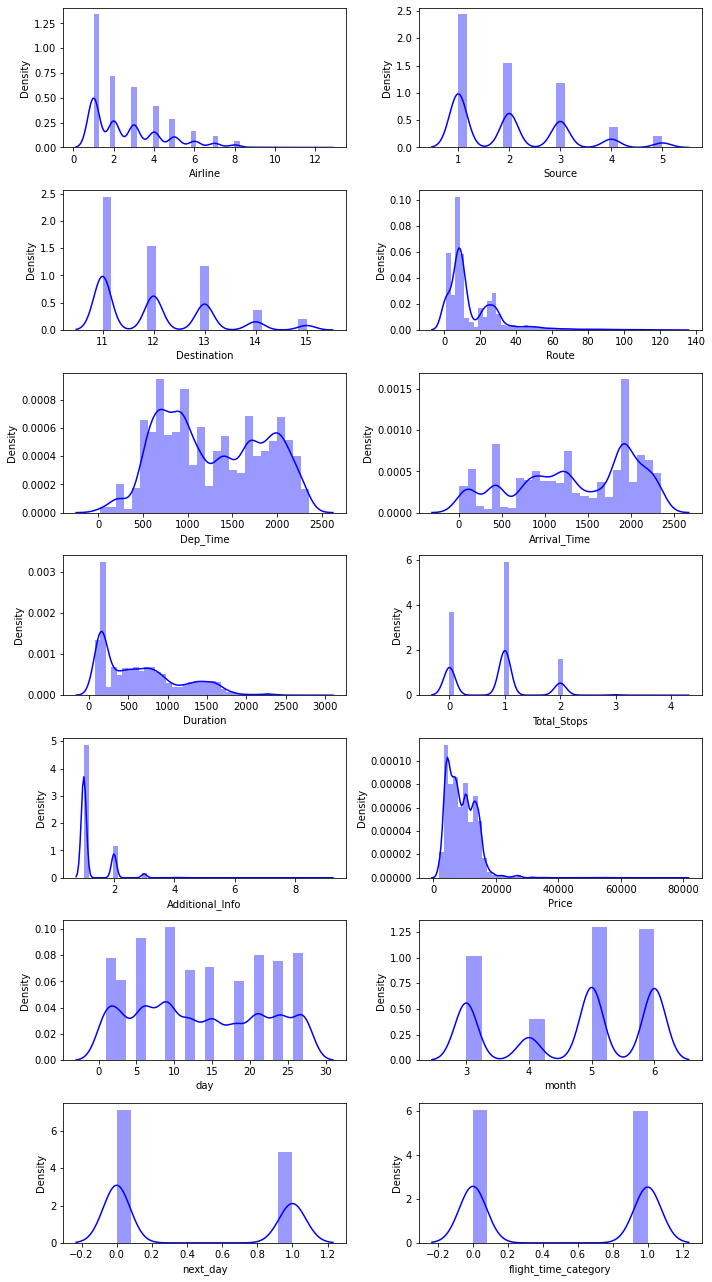

In [238]:
#Checking the distribution of the features
plt.figure(figsize=(10,20))
plt.title('Distribution Analysis', fontsize=20, fontweight='bold')
c=0
for i in df:
    plt.subplot(8, 2, c+1)
    sns.distplot(x=df[i], color='b')
    plt.xlabel(i)
    #plt.show()
    plt.tight_layout()
    c+=1

##### Checking outlisers using boxplot

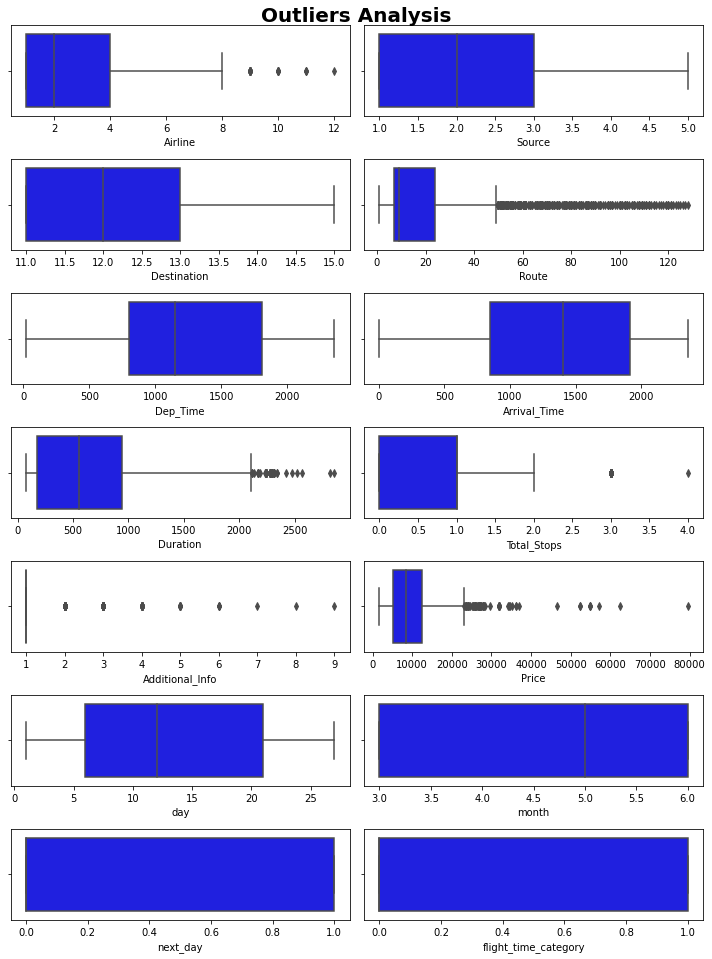

In [234]:
#analysing the features using countplot
plt.figure(figsize=(10,15))
plt.suptitle('Outliers Analysis', fontsize=20, fontweight='bold')
c=0
for i in df:
    plt.subplot(8, 2, c+1)
    sns.boxplot(x=df[i],data=df, color='b')
    plt.xlabel(i)
    #plt.show()
    plt.tight_layout()
    c+=1

##### There are some positive outliers in Duration, Price, Route. We'll try to handle the outliers.

In [267]:
#Using IQR technique to detect outliers
df_clone=df.copy()
cols_to_drop=[]
def outlier_handling(feature):
    q1=df[feature].quantile(0.25)
    q4=df[feature].quantile(0.75)
    IQR=q4-q1
    lower_fence=q1-1.5*IQR
    upper_fence=q4+1.5*IQR
    cols_to_drop=list(df[df[feature]>upper_fence].index)
    df.drop(cols_to_drop,inplace=True)
    return f'Outliers removed from{feature}'

In [268]:
print(outlier_handling('Price'))

Outliers removed fromPrice


In [269]:
print(outlier_handling('Price'))

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,next_day,flight_time_category
0,2,3,13,1,2220,110,170,0,1,3897,24,3,1,1
1,3,2,12,2,550,1315,445,2,1,7662,1,5,0,0
2,1,1,11,3,925,425,1140,2,1,13882,9,6,1,0
3,2,2,12,4,1805,2330,325,1,1,6218,12,5,0,1
4,2,3,13,5,1650,2135,285,1,1,13302,1,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10676,7,2,12,6,1955,2225,150,0,1,4107,9,4,0,1
10677,3,2,12,6,2045,2320,155,0,1,4145,27,4,0,1
10678,1,3,13,1,820,1120,180,0,1,7229,27,4,0,0
10679,6,3,13,1,1130,1410,160,0,1,12648,1,3,0,0


##### Removing outliers from Duration

In [270]:
print(outlier_handling('Duration'))

Outliers removed fromDuration


##### Checking the distribution for Price and Duration after removing outliers

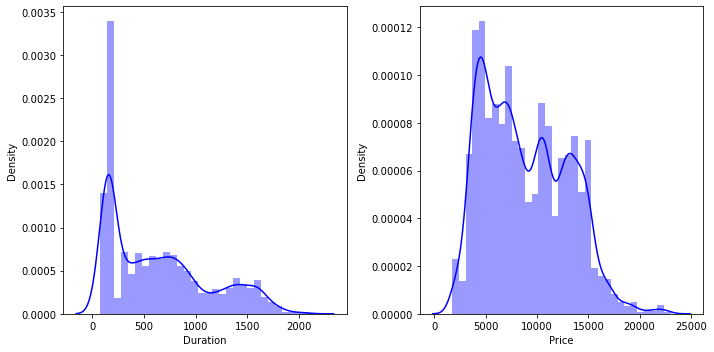

In [272]:
#Distribution of Price and Duration features
plt.figure(figsize=(10,5))
plt.title('Distribution Analysis', fontsize=20, fontweight='bold')
plt.subplot(1,2,1)
sns.distplot(x=df['Duration'], color='b')
plt.xlabel('Duration')
#plt.show()
plt.tight_layout()

plt.subplot(1,2,2)
sns.distplot(x=df['Price'], color='b')
plt.xlabel('Price')
#plt.show()
plt.tight_layout()

##### Plotting regression for all features against target feature Price

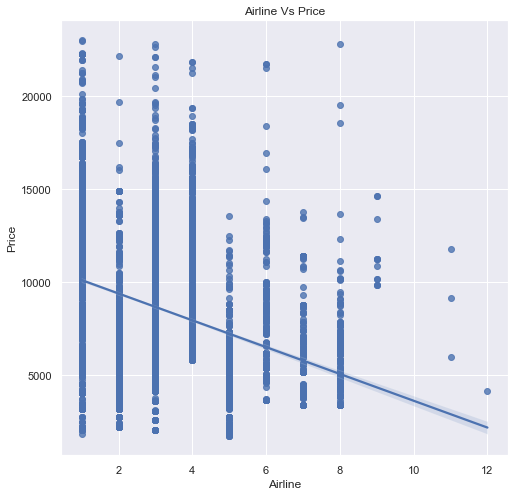

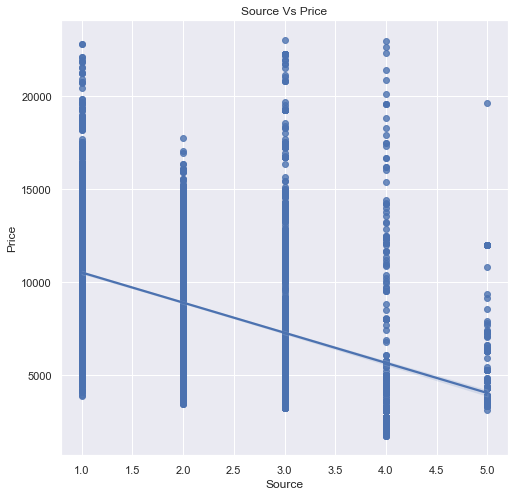

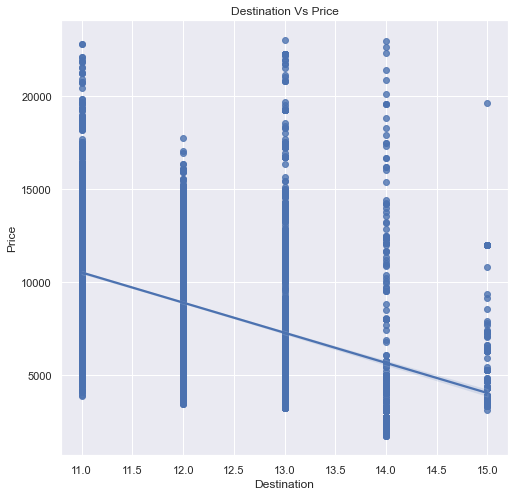

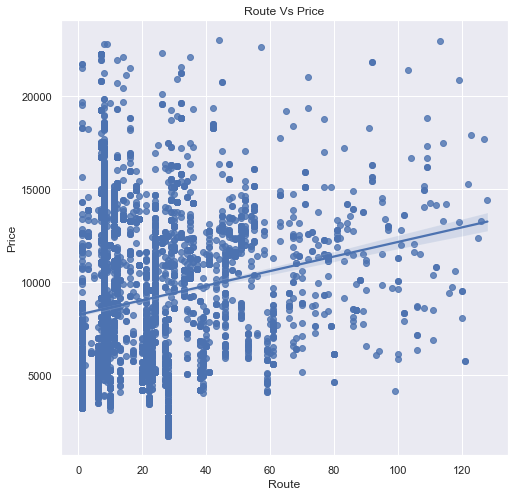

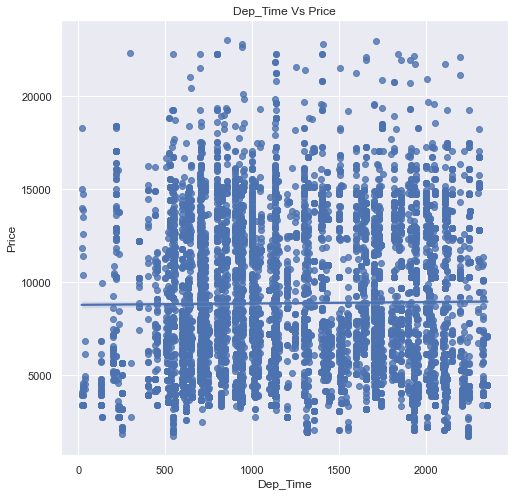

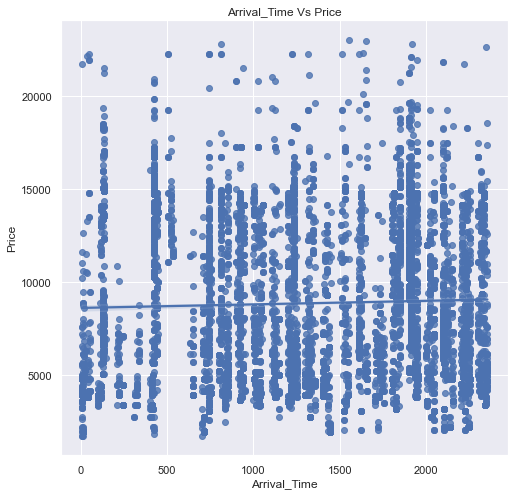

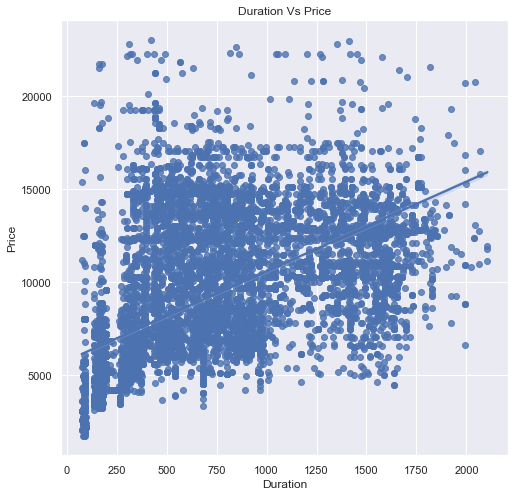

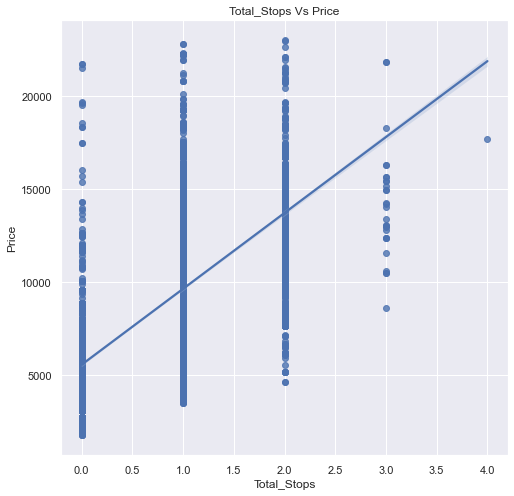

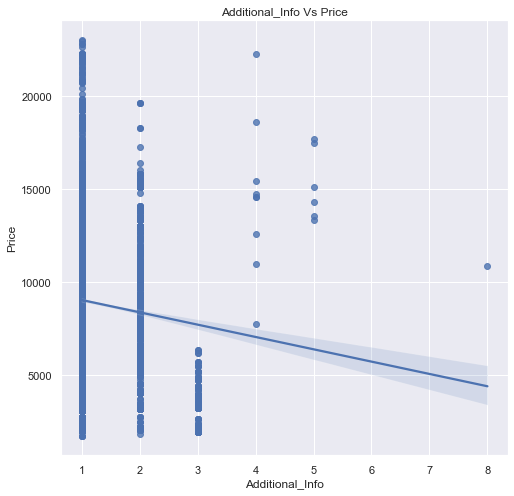

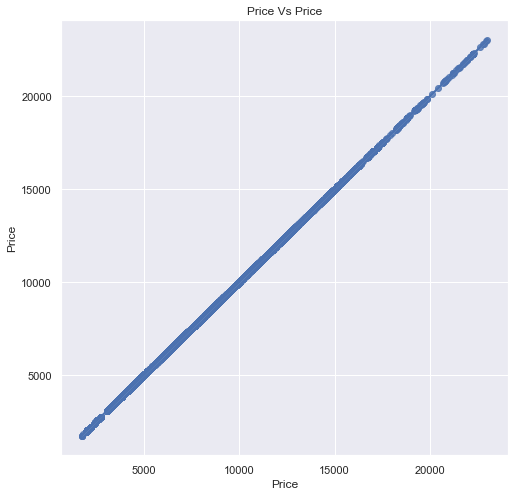

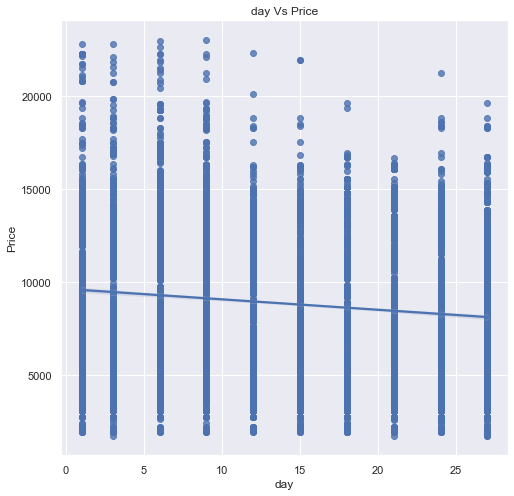

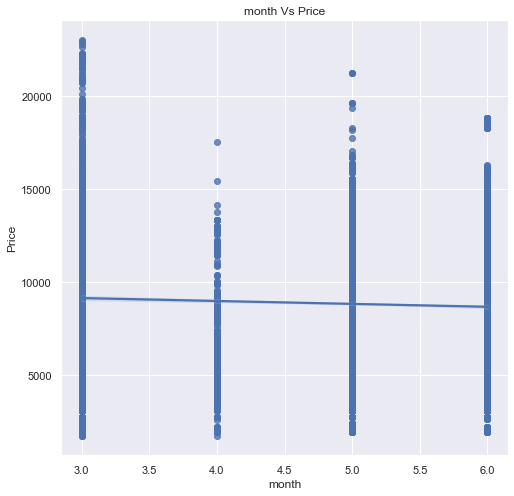

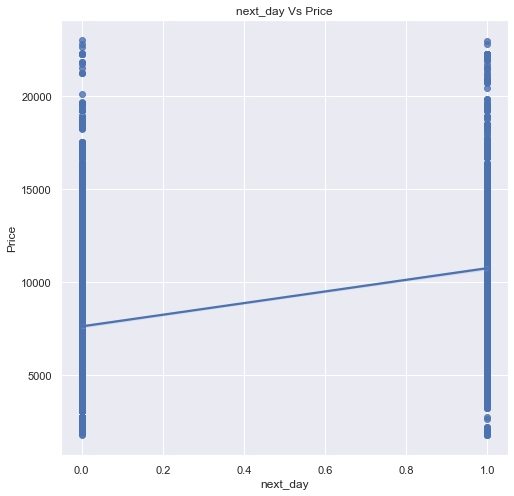

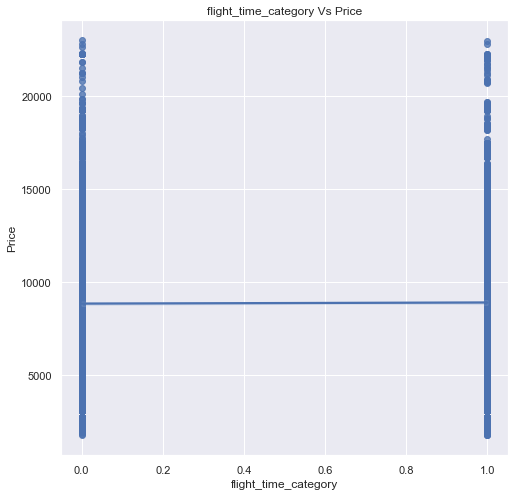

In [273]:
for feature in df:
    sns.set(rc={'figure.figsize':(8,8)})
    sns.regplot(x=df[feature], y=df['Price'])
    plt.title("{} Vs Price".format(feature))
    plt.show()

### Model Preparation

##### Separating independent (X) and dependant features (y)

In [274]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,day,month,next_day,flight_time_category
0,2,3,13,1,2220,110,170,0,1,3897,24,3,1,1
1,3,2,12,2,550,1315,445,2,1,7662,1,5,0,0
2,1,1,11,3,925,425,1140,2,1,13882,9,6,1,0
3,2,2,12,4,1805,2330,325,1,1,6218,12,5,0,1
4,2,3,13,5,1650,2135,285,1,1,13302,1,3,0,1


##### we can drop the 'Dep_Time' and 'Arrival_time' features as they are less useful

In [275]:
df.drop(columns=['Dep_Time','Arrival_Time'],inplace=True)
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,day,month,next_day,flight_time_category
0,2,3,13,1,170,0,1,3897,24,3,1,1
1,3,2,12,2,445,2,1,7662,1,5,0,0
2,1,1,11,3,1140,2,1,13882,9,6,1,0
3,2,2,12,4,325,1,1,6218,12,5,0,1
4,2,3,13,5,285,1,1,13302,1,3,0,1


In [277]:
X=df.drop('Price',axis=1)
y=df['Price']
X.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,day,month,next_day,flight_time_category
0,2,3,13,1,170,0,1,24,3,1,1
1,3,2,12,2,445,2,1,1,5,0,0
2,1,1,11,3,1140,2,1,9,6,1,0
3,2,2,12,4,325,1,1,12,5,0,1
4,2,3,13,5,285,1,1,1,3,0,1


In [278]:
y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10676     4107
10677     4145
10678     7229
10679    12648
10680    11753
Name: Price, Length: 10518, dtype: int32

#### Splitting data into Training and Test data

In [280]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=40)
X_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,day,month,next_day,flight_time_category
979,2,5,15,10,140,0,1,9,5,1,1
7588,1,1,11,30,1615,2,2,24,6,1,0
9488,1,2,12,24,1480,1,1,21,5,1,1
6195,3,4,14,28,90,0,1,1,5,0,1
1793,1,2,12,11,740,1,2,12,6,0,0


In [281]:
print(X_test.shape,y_test.shape)

(3471, 11) (3471,)


#### Standardization/Feature Scaling of the dataset

In [283]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [284]:
X_train=scaler.fit_transform(X_train)
X_train

array([[-0.38887183,  2.70391107,  2.70391107, ...,  0.23166192,
         1.24296504,  1.00697766],
       [-0.93130646, -0.92447345, -0.92447345, ...,  1.09910164,
         1.24296504, -0.99307069],
       [-0.93130646, -0.01737732, -0.01737732, ...,  0.23166192,
         1.24296504,  1.00697766],
       ...,
       [-0.38887183, -0.01737732, -0.01737732, ..., -0.6357778 ,
         1.24296504,  1.00697766],
       [-0.93130646,  1.79681494,  1.79681494, ...,  0.23166192,
        -0.80452786, -0.99307069],
       [ 0.15356281, -0.01737732, -0.01737732, ...,  0.23166192,
        -0.80452786,  1.00697766]])

In [285]:
X_test=scaler.fit_transform(X_test)
X_test

array([[ 0.69522893, -0.92066624, -0.92066624, ...,  1.09898053,
        -0.84452829, -1.01246606],
       [-0.93270425, -0.0115247 , -0.0115247 , ...,  1.09898053,
         1.18409295,  0.98768743],
       [ 1.78051772,  0.89761684,  0.89761684, ..., -1.48541068,
        -0.84452829, -1.01246606],
       ...,
       [-0.39005986, -0.0115247 , -0.0115247 , ...,  1.09898053,
        -0.84452829, -1.01246606],
       [ 1.23787333,  1.80675838,  1.80675838, ...,  0.2375168 ,
        -0.84452829, -1.01246606],
       [-0.93270425, -0.92066624, -0.92066624, ...,  0.2375168 ,
        -0.84452829, -1.01246606]])

### Model Building

#### Linear Regression

In [286]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [287]:
lin_reg=LinearRegression()

In [288]:
lin_reg.fit(X_train, y_train)

LinearRegression()

In [290]:
### printing the co-efficients of the best fit hyperplane
print('co-efficient is', lin_reg.coef_)
print('intercept is', lin_reg.intercept_)

co-efficient is [-7.18469170e+02  5.92546294e+16 -5.92546294e+16 -7.78250000e+02
  5.08000000e+02  2.54800000e+03 -4.38000000e+02 -4.75562500e+02
 -4.65000000e+02  2.40000000e+01 -2.40000000e+01]
intercept is 8858.163429463284


In [289]:
##### Predicting test data
y_pred=lin_reg.predict(X_test)

In [291]:
y_pred

array([9010.82644082, 9887.86450379, 5475.2651509 , ..., 5816.32004844,
       3838.51202902, 6047.78829802])

#### Validating the model using the assumptions of Linear Regression

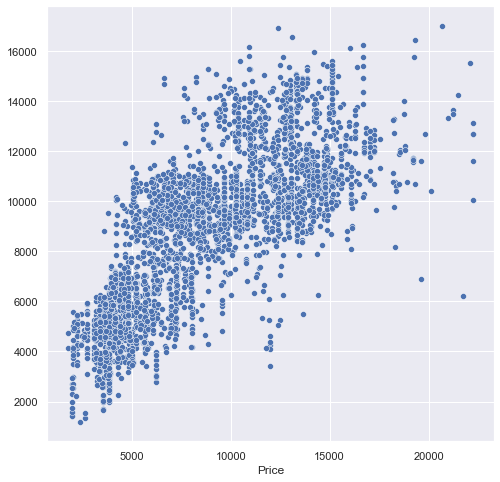

In [292]:
#test truth data and predicted data should have linear relationshiop as an indication of good model
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

#### Residual distribution

In [293]:
#Residual should follow normal distribution as an indication of good model
residual_lin_reg=y_pred-y_test
residual_lin_reg.head()

2452    -7097.173559
4963     -956.135496
9711     -662.734849
5065      -56.119339
10360   -3559.661189
Name: Price, dtype: float64

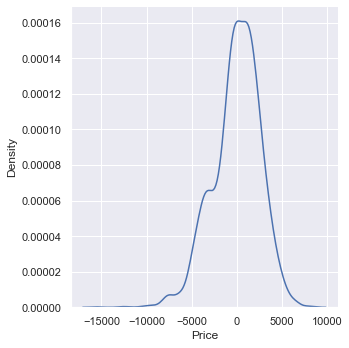

In [294]:
sns.displot(x=residual_lin_reg,kind='kde')

#### Residual vs Predicted distribution (Uniform Distribution)

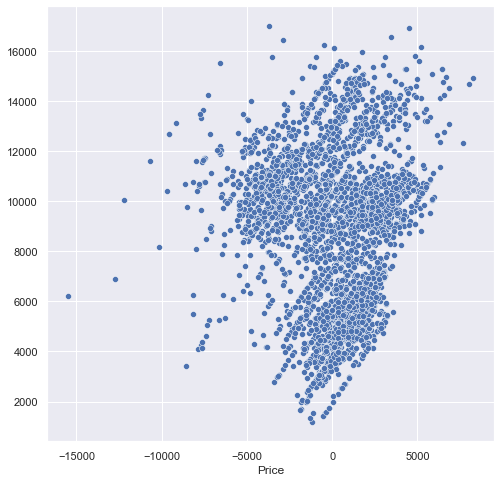

In [295]:
#Checking distribution between Residual and Predicted data. A good model should produce uniform distribution.
sns.scatterplot(x=residual_lin_reg,y=y_pred)
plt.show()

#### Performance Matrix (Cost Function Values)

##### MSE, MAE, RMSE

In [296]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [297]:
print('Mean Squared Error is', round(mean_squared_error(y_test,y_pred),3))
print( 'Mean Absolute Error is', round(mean_absolute_error(y_test,y_pred),3))
print('Root Mean Squared Error is', round(np.sqrt(mean_absolute_error(y_test,y_pred)),3))

Mean Squared Error is 6945037.997
Mean Absolute Error is 2055.734
Root Mean Squared Error is 45.34


##### R Square and Adjusted R Square Values

In [298]:
from sklearn.metrics import r2_score

In [299]:
lin_reg_r2=r2_score(y_test,y_pred)
print('Linear regression R square value is',round(lin_reg_r2*100.00,3))
adj_lin_reg_r2=1-((1-lin_reg_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Adjusted R2 score is',round(adj_lin_reg_r2*100.00,3))

Linear regression R square value is 57.301
Adjusted R2 score is 57.166


### Ridge Regression

In [300]:
ridge_reg=Ridge()

In [301]:
ridge_reg.fit(X_train, y_train)

Ridge()

In [302]:
### printing the co-efficients of the best fit hyperplane
print('co-efficient is', ridge_reg.coef_)
print('intercept is', ridge_reg.intercept_)

co-efficient is [-745.41878784  -15.32441294  -15.32441294 -745.71511975  474.50869099
 2563.55469949 -422.76144304 -474.4068441  -456.7856606    21.78143936
  -12.72398492]
intercept is 8879.074499787144


In [303]:
# Predicting test data
y_pred=ridge_reg.predict(X_test)

#### Validating the model using the assumptions of Ridge Regression

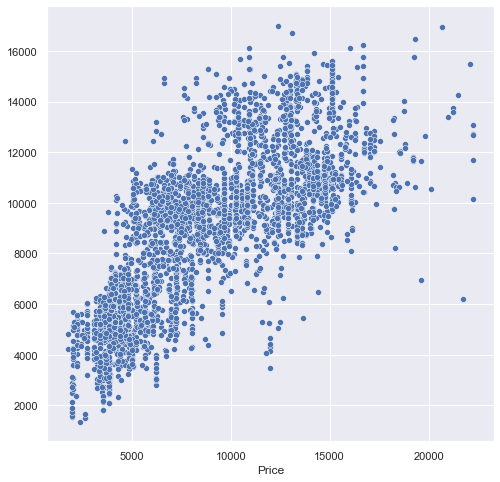

In [304]:
#test truth data and predicted data should have linear relationshiop as an indication of good model
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

#### Residual distribution

In [305]:
#Residual should follow normal distribution as an indication of good model
residual_ridge_reg=y_pred-y_test
residual_ridge_reg.head()

2452    -7099.968050
4963     -863.727309
9711     -689.866748
5065       77.282237
10360   -3542.135534
Name: Price, dtype: float64

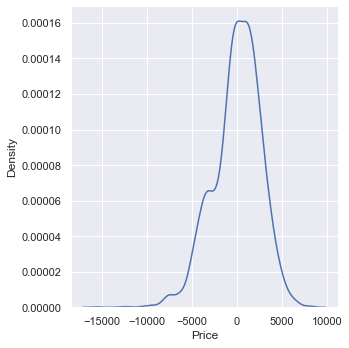

In [306]:
sns.displot(x=residual_ridge_reg,kind='kde')

#### Residual vs Predicted distribution (Uniform Distribution)

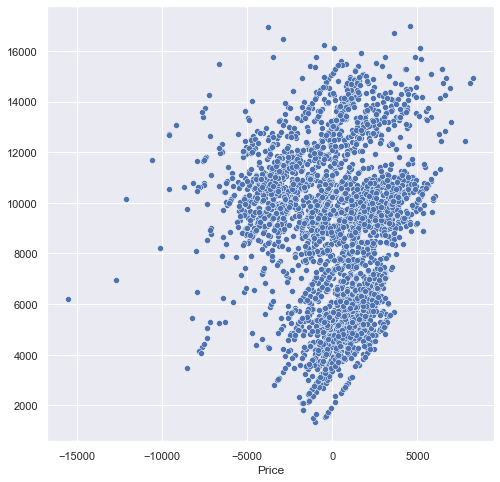

In [307]:
#Checking distribution between Residual and Predicted data. A good model should produce uniform distribution.
sns.scatterplot(x=residual_ridge_reg,y=y_pred)
plt.show()

#### Performance Matrix (Cost Function Values)

##### MSE, MAE and RMSE

In [308]:
print('Mean Squared Error is', round(mean_squared_error(y_test,y_pred),3))
print( 'Mean Absolute Error is', round(mean_absolute_error(y_test,y_pred),3))
print('Root Mean Squared Error is', round(np.sqrt(mean_absolute_error(y_test,y_pred)),3))

Mean Squared Error is 6958632.305
Mean Absolute Error is 2060.704
Root Mean Squared Error is 45.395


#### R Square and Adjusted R Square Values

In [310]:
ridge_reg_r2=r2_score(y_test,y_pred)
print('Linear regression R square value is',round(ridge_reg_r2*100.00,3))
adj_ridge_reg_r2=1-((1-ridge_reg_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Adjusted R2 score is',round(adj_ridge_reg_r2*100.00,3))

Linear regression R square value is 57.218
Adjusted R2 score is 57.082


### Lasso Regression

In [311]:
lasso_reg=Lasso()

In [312]:
lasso_reg.fit(X_train,y_train)

Lasso()

In [313]:
### printing the co-efficients of the best fit hyperplane
print('co-efficient is', lasso_reg.coef_)
print('intercept is', lasso_reg.intercept_)

co-efficient is [-7.44527005e+02 -2.99688651e+01 -4.95595240e-14 -7.44242388e+02
  4.74963673e+02  2.56338403e+03 -4.21584450e+02 -4.73315387e+02
 -4.55589634e+02  1.98082072e+01 -1.07781182e+01]
intercept is 8879.074499787144


In [314]:
# Predicting test data
y_pred=lasso_reg.predict(X_test)

In [315]:
y_pred

array([9007.72711867, 9980.68950027, 5446.21115598, ..., 5855.49982728,
       3918.23788969, 6111.16549849])

#### Validating the model using the assumptions of Lasso Regression

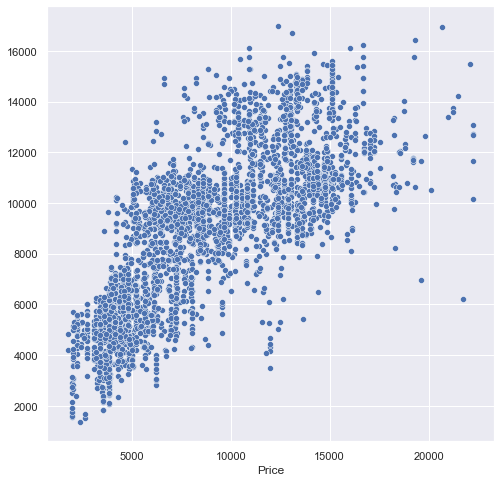

In [316]:
#test truth data and predicted data should have linear relationshiop as an indication of good model
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

#### Residual distribution

In [317]:
#Residual should follow normal distribution as an indication of good model
residual_lasso_reg=y_pred-y_test
residual_lasso_reg.head()

2452    -7100.272881
4963     -863.310500
9711     -691.788844
5065       77.167696
10360   -3547.978319
Name: Price, dtype: float64

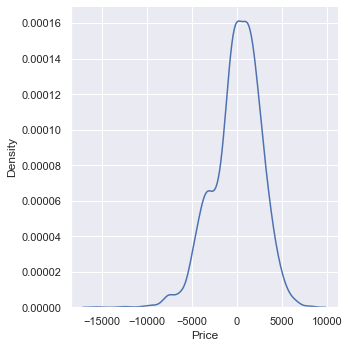

In [318]:
sns.displot(x=residual_lasso_reg,kind='kde')

#### Residual vs Predicted distribution (Uniform Distribution)

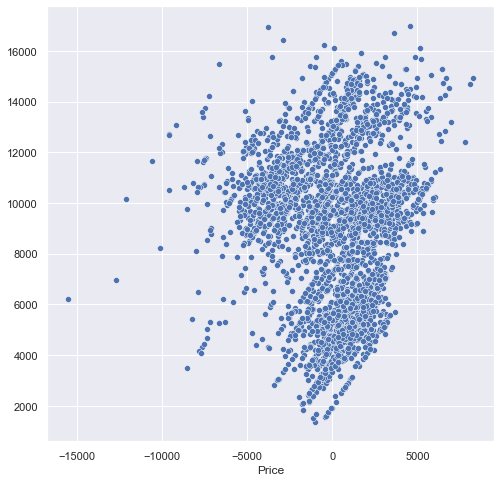

In [319]:
#Checking distribution between Residual and Predicted data. A good model should produce uniform distribution.
sns.scatterplot(x=residual_lasso_reg,y=y_pred)
plt.show()

#### Performance Matrix (Cost Function Values)

##### MSE, MAE and RMSE

In [320]:
print('Mean Squared Error is', round(mean_squared_error(y_test,y_pred),3))
print( 'Mean Absolute Error is', round(mean_absolute_error(y_test,y_pred),3))
print('Root Mean Squared Error is', round(np.sqrt(mean_absolute_error(y_test,y_pred)),3))

Mean Squared Error is 6959517.524
Mean Absolute Error is 2060.662
Root Mean Squared Error is 45.395


In [321]:
lasso_reg_r2=r2_score(y_test,y_pred)
print('Linear regression R square value is',round(lasso_reg_r2*100.00,3))
adj_lasso_reg_r2=1-((1-lasso_reg_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Adjusted R2 score is',round(adj_lasso_reg_r2*100.00,3))

Linear regression R square value is 57.212
Adjusted R2 score is 57.076


### Elastic Net Regression

In [322]:
elastic_net_reg=ElasticNet()

In [323]:
elastic_net_reg.fit(X_train,y_train)

ElasticNet()

#### printing the co-efficients of the best fit hyperplane

In [324]:
print('co-efficient is', elastic_net_reg.coef_)
print('intercept is', elastic_net_reg.intercept_)

co-efficient is [-588.82268961 -287.05461262 -287.06043536  -82.40802338  653.97632054
 1143.49319983 -271.376221   -299.82398311 -271.48923615  242.31711054
  -59.6786628 ]
intercept is 8879.074499787144


In [325]:
# Predicting test data
y_pred=elastic_net_reg.predict(X_test)

#### Validating the model using the assumptions of Elastic-Net Regression

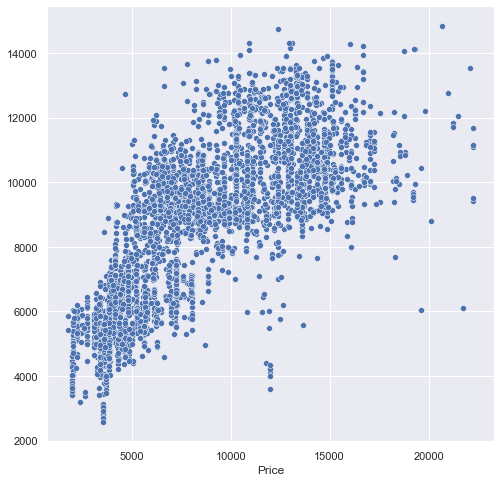

In [327]:
#test truth data and predicted data should have linear relationshiop as an indication of good model
sns.scatterplot(x=y_test,y=y_pred)
plt.show()

#### Residual distribution

In [328]:
#Residual should follow normal distribution as an indication of good model
residual_elastic_net_reg=y_pred-y_test
residual_elastic_net_reg.head()

2452    -7222.511188
4963    -1057.812146
9711     -419.199517
5065      672.228545
10360   -4120.325670
Name: Price, dtype: float64

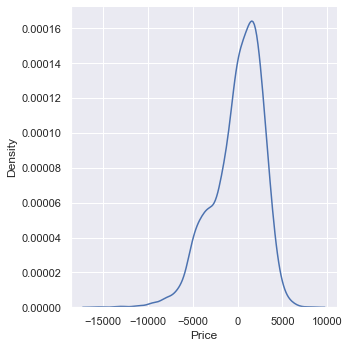

In [329]:
sns.displot(x=residual_elastic_net_reg,kind='kde')

#### Residual vs Predicted distribution (Uniform Distribution)

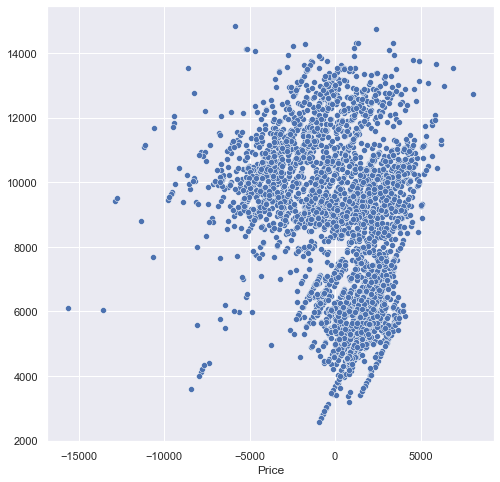

In [330]:
#Checking distribution between Residual and Predicted data. A good model should produce uniform distribution.
sns.scatterplot(x=residual_elastic_net_reg,y=y_pred)
plt.show()

#### Performance Matrix (Cost Function Values)

##### MSE, MAE and RMSE

In [331]:
print('Mean Squared Error is', round(mean_squared_error(y_test,y_pred),3))
print( 'Mean Absolute Error is', round(mean_absolute_error(y_test,y_pred),3))
print('Root Mean Squared Error is', round(np.sqrt(mean_absolute_error(y_test,y_pred)),3))

Mean Squared Error is 7785163.694
Mean Absolute Error is 2201.99
Root Mean Squared Error is 46.925


In [332]:
elastic_net_reg_r2=r2_score(y_test,y_pred)
print('Elastic Net regression R square value is',round(elastic_net_reg_r2*100.00,3))
adj_lasso_reg_r2=1-((1-elastic_net_reg_r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('Adjusted R2 score is',round(adj_lasso_reg_r2*100.00,3))

Elastic Net regression R square value is 52.136
Adjusted R2 score is 51.984
